# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [3]:
features = fraud.drop(columns=["fraud"])
target = fraud["fraud"]

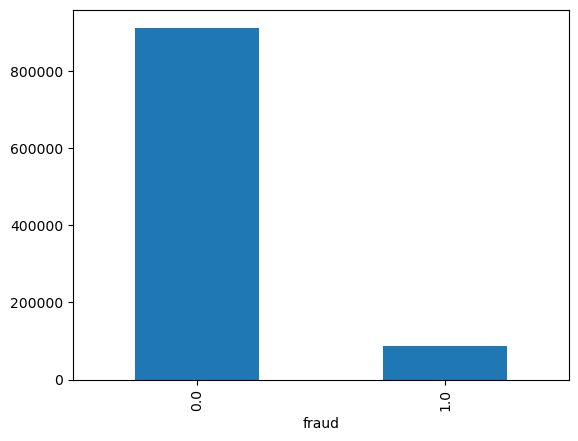

In [4]:
target.value_counts().plot(kind="bar");

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_norm_np = scaler.fit_transform(X_train)
X_test_norm_np = scaler.transform(X_test)

X_train_norm_df = pd.DataFrame(X_train_norm_np, columns=features.columns)
X_test_norm_df = pd.DataFrame(X_test_norm_np, columns=features.columns)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()

model.fit(X_train_norm_df, y_train)

y_pred = model.predict(X_test_norm_df)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



In [8]:
yes_fraud = fraud[fraud["fraud"] == 1]
no_fraud = fraud[fraud["fraud"] == 0]
len(yes_fraud), len(no_fraud)

(87403, 912597)

In [9]:
from sklearn.utils import resample

yes_fraud_oversampled = resample(yes_fraud, replace=True, n_samples=len(no_fraud), random_state=42)

len(yes_fraud_oversampled), len(no_fraud)

(912597, 912597)

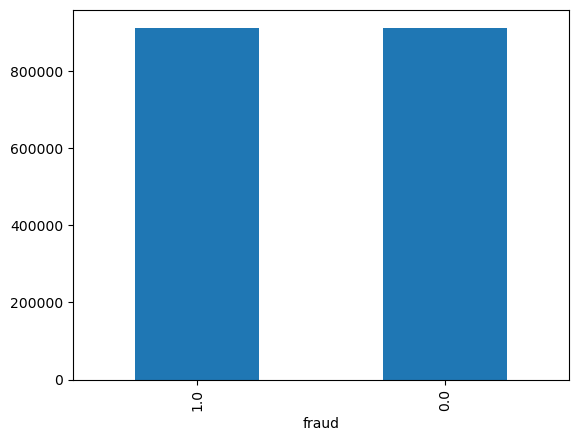

In [10]:
train_over = pd.concat([yes_fraud_oversampled, no_fraud])
train_over["fraud"].value_counts().plot(kind="bar");

In [11]:
features_over = train_over.drop(columns=["fraud"])
target_over = train_over["fraud"]

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(features_over, target_over, test_size=0.2, random_state=42)

scaler_over = StandardScaler()

X_train_over_np = scaler_over.fit_transform(X_train_over)
X_test_over_np = scaler_over.transform(X_test_over)

X_train_over_df = pd.DataFrame(X_train_over_np, columns=features_over.columns)
X_test_over_df = pd.DataFrame(X_test_over_np, columns=features_over.columns)

model_over = LogisticRegression()

model_over.fit(X_train_over_df, y_train_over)
print(classification_report(y_test_over, model_over.predict(X_test_over_df)))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94    182575
         1.0       0.93      0.95      0.94    182464

    accuracy                           0.94    365039
   macro avg       0.94      0.94      0.94    365039
weighted avg       0.94      0.94      0.94    365039



In [12]:
no_fraud_undersampled = resample(no_fraud, replace=True, n_samples=len(yes_fraud), random_state=42)

len(yes_fraud), len(no_fraud_undersampled)

(87403, 87403)

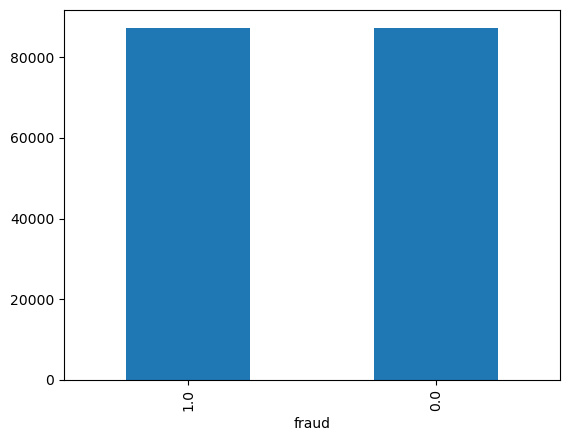

In [13]:
train_under = pd.concat([yes_fraud, no_fraud_undersampled])
train_under["fraud"].value_counts().plot(kind="bar");

In [14]:
features_under = train_under.drop(columns=["fraud"])
target_under = train_under["fraud"]

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(features_under, target_under, test_size=0.2, random_state=42)

scaler_under = StandardScaler()

X_train_under_np = scaler_under.fit_transform(X_train_under)
X_test_under_np = scaler_under.transform(X_test_under)

X_train_under_df = pd.DataFrame(X_train_under_np, columns=features_under.columns)
X_test_under_df = pd.DataFrame(X_test_under_np, columns=features_under.columns)

model_under = LogisticRegression()

model_under.fit(X_train_under_df, y_train_under)
print(classification_report(y_test_under, model_under.predict(X_test_under_df)))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     17488
         1.0       0.93      0.95      0.94     17474

    accuracy                           0.94     34962
   macro avg       0.94      0.94      0.94     34962
weighted avg       0.94      0.94      0.94     34962



In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_norm_np, y_train)
X_train_sm_df = pd.DataFrame(X_train_sm, columns=features.columns)

model = LogisticRegression()
model.fit(X_train_sm_df, y_train_sm)
model.score(X_train_sm_df, y_train_sm)

y_pred = model.predict(X_test_norm_df)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

